In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [37]:
def random_walk(mean = 0, stdev = 1, iterations = 100, realisations=1):
    return np.cumsum(np.random.normal(mean, stdev, (realisations, iterations)), axis=1)

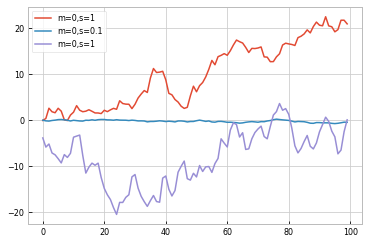

In [38]:
plt.plot(random_walk().T, label="m=0,s=1")
plt.plot(random_walk(mean = 0, stdev=0.1).T, label="m=0,s=0.1")
plt.plot(random_walk(mean = 0, stdev=2).T, label="m=0,s=1")
plt.legend()

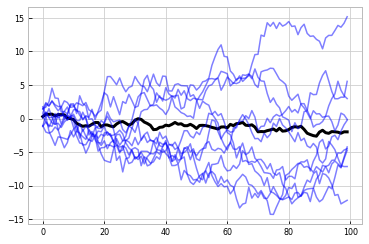

In [47]:
plt.plot(np.mean(random_walk(realisations=10), axis=0), color="k", lw=3);
plt.plot(random_walk(realisations=10).T, color='blue', alpha=0.5);

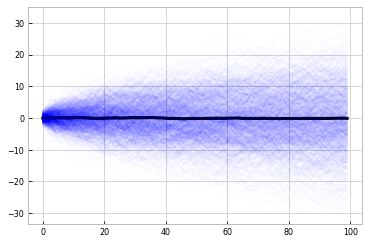

In [52]:
plt.plot(np.mean(random_walk(realisations=1000), axis=0), color="k", lw=3);
plt.plot(random_walk(realisations=1000).T, color='blue', alpha=0.01);

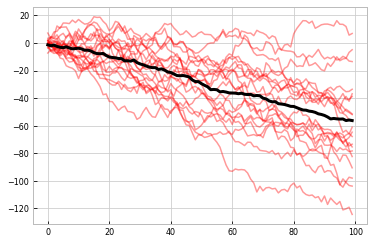

In [46]:
plt.plot(np.mean(random_walk(mean=-0.5, stdev=3, realisations=20), axis=0), color="k", lw=3);
plt.plot(random_walk(mean=-0.5, stdev=3, realisations=20).T, color='red', alpha=0.4);

In [56]:
import scipy.spatial

In [112]:
def exp_q(x, y, length=1):
    """The squared-exponential covariance function"""
    distances = scipy.spatial.distance.cdist(np.expand_dims(x, 1), np.expand_dims(y, 1), "sqeuclidean")
    return np.exp(-0.5 * 1./length * distances)

In [113]:
x = np.linspace(-20, 20, 100)
K = exp_q(x,x, length=1)

In [114]:
def gp_prior(x, covariance_function, realisations=1, **covariance_pars):
    K = covariance_function(x,x, **covariance_pars)
    return np.array([np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K) for i in range(realisations)])

In [180]:
stepState = 0
def gp_prior_samples(x, covariance_function, realisations=1, alpha=0.2, **covariance_pars):
    K = covariance_function(x,x, **covariance_pars)
    
    alpha = 1-alpha
    p = []
    z = []
    
    steps = realisations
    for step in range(steps):
        if step == 0:
            initial = np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K)
            z.append(initial)
            p.append(initial)
        if step % 50 == 0:
            z.append(p[-1])
            
            new_state = alpha*p[-1] + (np.sqrt(1-alpha**2) * np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K))
            
            p.append(new_state)
        else:
            a = p[-1]
            b = z[-1] 
            c = -1 * z[-1]
            d = p[-1]
            
            z.append((a * np.sin(0.1)) + (b * np.cos(0.1)))
            #outs.append(alpha * outs[-1] + np.sqrt(1-alpha**2) * np.random.multivariate_normal(mean = 0.4*np.ones(K.shape[0]), cov=K))
            p.append((c * np.sin(0.1)) + (d*np.cos(0.1)))

    return np.array(p)

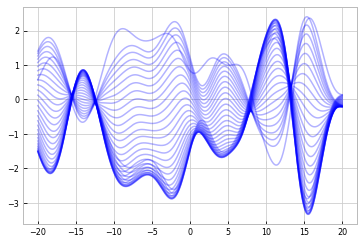

In [181]:
plt.plot(x, gp_prior_samples(x, exp_q, realisations=30, length=5).T, color='b', alpha=0.3);

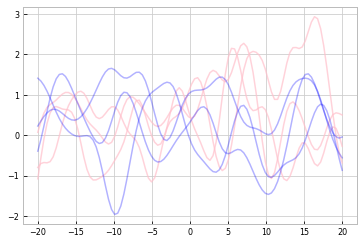

In [121]:
plt.plot(x, gp_prior(x, exp_q, realisations=3, length=3).T, color='pink', alpha=0.7);
plt.plot(x, gp_prior(x, exp_q, realisations=3, length=5).T, color='b', alpha=0.3);

In [125]:
samples = gp_prior(x, exp_q, realisations=200, length=3).T

In [128]:
from matplotlib.animation import FuncAnimation

In [ ]:
from IPython.display import HTML
fig = plt.figure(dpi=50, figsize=(5,2))
ax = plt.axes(xlim=(-20, 20), ylim=(-2, 2))

x = np.linspace(-20, 20, 1000)

samples = gp_prior_samples(x, exp_q, realisations=1000, length=3).T

line, = ax.plot([], [], lw=1)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    y = samples[:, i]
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=1000, interval=50, blit=True)
HTML(anim.to_html5_video())